In [1]:
import torch  

In [5]:
x = torch.tensor(5.0)

tensor(5.)

In [6]:
y = torch.tensor([1.0, 2.0, 3.0])

In [7]:
x = torch.tensor([1,2,3])
y= torch.tensor([4,5,6])

x + y

tensor([5, 7, 9])

In [22]:
x = torch.tensor([1, 2, 3, 4])
x1 = x.unsqueeze(0)
x2 = x.unsqueeze(1)
x2

tensor([[1],
        [2],
        [3],
        [4]])

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
# 선형 층 생성
linear_layer = nn.Linear(in_features=10, out_features=5)

# 임의의 입력 텐서 생성
input_tensor = torch.randn(2, 10)  # 배치 크기 1, 입력 특성 10

# 선형 층을 통과시켜 출력 계산
output_tensor = linear_layer(input_tensor)

print("Output Tensor:", output_tensor)

Output Tensor: tensor([[ 0.1622,  0.3018, -1.1203,  0.6952,  1.0104],
        [ 0.3073,  1.1359, -0.2298,  0.3634,  0.4409]],
       grad_fn=<AddmmBackward0>)


In [32]:
# 가중치 확인
print("Weights:", linear_layer.weight)

# 편향 확인
print("Bias:", linear_layer.bias)

Weights: Parameter containing:
tensor([[ 0.2717, -0.1849,  0.0869, -0.1762,  0.1428,  0.0502,  0.2912,  0.0676,
          0.1594,  0.1530],
        [ 0.0766,  0.0526, -0.1807, -0.2994,  0.1070, -0.1215,  0.0743, -0.1486,
         -0.2367, -0.1112],
        [ 0.2832, -0.2847, -0.2184,  0.1522,  0.0104, -0.2225,  0.1321,  0.0550,
         -0.1947,  0.2072],
        [-0.1595,  0.0909, -0.2351,  0.1131,  0.2663, -0.2464,  0.1580, -0.1524,
         -0.1944, -0.0701],
        [ 0.0567,  0.2186, -0.1587, -0.0937,  0.0946, -0.0281,  0.2225, -0.1226,
         -0.0724, -0.0393]], requires_grad=True)
Bias: Parameter containing:
tensor([-0.1506, -0.1782,  0.0956,  0.2645,  0.1353], requires_grad=True)


In [40]:


# 실습: XOR 예측 문제 
class XORModel(nn.Module): 
    def __init__(self):
        super(XORModel, self).__init__()
        self.layer1 = nn.Linear(2, 2) # 입력 2개, 출력 2개인 레이어 1 
        self.layer2 = nn.Linear(2, 1) # 입력 2개, 출력이 1개인 레이어 2 
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.sigmoid(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x 

# 데이터 정의
x_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_data = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)
model = XORModel()


# 모델 초기화 
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

losses = []
for epoch in range(10001): 
    # Forward pass 
    outputs = model(x_data)
    loss = criterion(outputs, y_data)
    
    # Backward pass and optimization 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    if (epoch % 1000 == 0): 
        print(f'Epoch [{epoch/10000}, Loss: {loss.item():.4f}')


Epoch [0.0, Loss: 0.7085
Epoch [0.1, Loss: 0.6930
Epoch [0.2, Loss: 0.6926
Epoch [0.3, Loss: 0.6913
Epoch [0.4, Loss: 0.6811
Epoch [0.5, Loss: 0.5105
Epoch [0.6, Loss: 0.1543
Epoch [0.7, Loss: 0.0687
Epoch [0.8, Loss: 0.0421
Epoch [0.9, Loss: 0.0299
Epoch [1.0, Loss: 0.0231


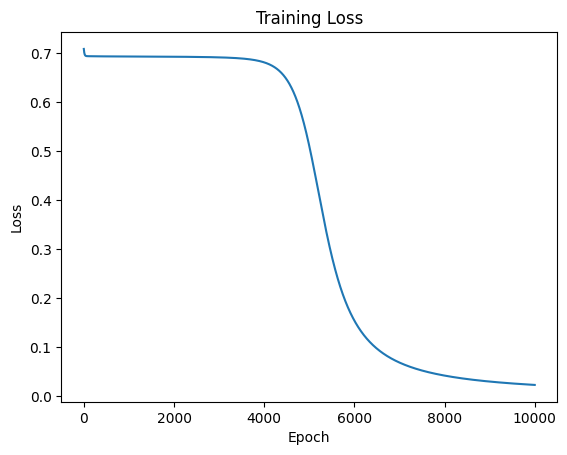

In [44]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Training Loss')
plt.show()

In [45]:
with torch.no_grad(): 
    test = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
    
    predicted = model(test)
    
    print(predicted)

tensor([[0.0224],
        [0.9700],
        [0.9800],
        [0.0188]])


In [52]:
from torchviz import make_dot

x = torch.randn(1, 2)
y = model(x)
make_dot(y, params={**dict(model.named_parameters()), y: y} )
x

tensor([[-2.1789,  0.9962]])

In [ ]:
import torch
import torch.nn as nn 
import torchvision.datasets as dsets 
import torchvision.transforms as transforms 
import matplotlib.pyplot as plt 
from itertools import islice
from torch.autograd import Variable


input_size = 784 # 이미지 사이즈 
hidden_size = 500 # 히든 레이어 숫자 
num_classes = 10  # 출력 테스트 종류 
num_epochs =  20 # 학습에 사용할 Epoch 수 
batch_size = 100 # 학습 입력 배치 크기 
lr = 1e-3 # 학습률 


train_data = dsets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)
test_data = dsets.MNIST(root="./data", train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)


class Net(nn.Module): 
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out 
    

net = Net(input_size, hidden_size, num_classes)

if torch.cuda.is_available(): 
    net.cuda()
    
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

for epoch in range(num_epochs): 
    for i, (images, labels) in enumerate(train_loader): 
        images = Variable(images.view(-1, 28 * 28)).cuda() 
        labels = Variable(labels).cuda() 
        
        optimizer.zero_grad()
        
        outputs = net(images)
        
        loss = loss_function(outputs, labels)
        
        loss.backward()
        
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print("Epoch [%d/%d], Step [%d/%d], Loss: %.4f" %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.data))
            
# Expected Result:  
# Epoch [1/20], Step [100/600], Loss: 0.4614
# Epoch [1/20], Step [200/600], Loss: 0.1303
# Epoch [1/20], Step [300/600], Loss: 0.1825
# Epoch [1/20], Step [400/600], Loss: 0.1427
# Epoch [1/20], Step [500/600], Loss: 0.1457
# Epoch [1/20], Step [600/600], Loss: 0.2165
# Epoch [2/20], Step [100/600], Loss: 0.0750
# Epoch [2/20], Step [200/600], Loss: 0.0792
# Epoch [2/20], Step [300/600], Loss: 0.0518
# Epoch [2/20], Step [400/600], Loss: 0.1189
# Epoch [2/20], Step [500/600], Loss: 0.0689
# Epoch [2/20], Step [600/600], Loss: 0.1443
# Epoch [3/20], Step [100/600], Loss: 0.1300
# Epoch [3/20], Step [200/600], Loss: 0.1006
# Epoch [3/20], Step [300/600], Loss: 0.0936
# Epoch [3/20], Step [400/600], Loss: 0.0251
# Epoch [3/20], Step [500/600], Loss: 0.0668
# Epoch [3/20], Step [600/600], Loss: 0.0784
# Epoch [4/20], Step [100/600], Loss: 0.1008
# Epoch [4/20], Step [200/600], Loss: 0.0549
# Epoch [4/20], Step [300/600], Loss: 0.0399
# Epoch [4/20], Step [400/600], Loss: 0.1201
# Epoch [4/20], Step [500/600], Loss: 0.1244
# Epoch [4/20], Step [600/600], Loss: 0.0282
# Epoch [5/20], Step [100/600], Loss: 0.0203
# Epoch [5/20], Step [200/600], Loss: 0.0467
# Epoch [5/20], Step [300/600], Loss: 0.0503
# Epoch [5/20], Step [400/600], Loss: 0.0214
# Epoch [5/20], Step [500/600], Loss: 0.0086
# Epoch [5/20], Step [600/600], Loss: 0.0298
# Epoch [6/20], Step [100/600], Loss: 0.0142
# Epoch [6/20], Step [200/600], Loss: 0.0374
# Epoch [6/20], Step [300/600], Loss: 0.0243
# Epoch [6/20], Step [400/600], Loss: 0.0415
# Epoch [6/20], Step [500/600], Loss: 0.0334
# Epoch [6/20], Step [600/600], Loss: 0.0169
# Epoch [7/20], Step [100/600], Loss: 0.0440
# Epoch [7/20], Step [200/600], Loss: 0.0134
# Epoch [7/20], Step [300/600], Loss: 0.0302
# Epoch [7/20], Step [400/600], Loss: 0.0212
# Epoch [7/20], Step [500/600], Loss: 0.0163
# Epoch [7/20], Step [600/600], Loss: 0.0083
# Epoch [8/20], Step [100/600], Loss: 0.0086
# Epoch [8/20], Step [200/600], Loss: 0.0069
# Epoch [8/20], Step [300/600], Loss: 0.0069
# Epoch [8/20], Step [400/600], Loss: 0.0103
# Epoch [8/20], Step [500/600], Loss: 0.0128
# Epoch [8/20], Step [600/600], Loss: 0.0059
# Epoch [9/20], Step [100/600], Loss: 0.0169
# Epoch [9/20], Step [200/600], Loss: 0.0273
# Epoch [9/20], Step [300/600], Loss: 0.0208
# Epoch [9/20], Step [400/600], Loss: 0.0045
# Epoch [9/20], Step [500/600], Loss: 0.0280
# Epoch [9/20], Step [600/600], Loss: 0.0168
# Epoch [10/20], Step [100/600], Loss: 0.0154
# Epoch [10/20], Step [200/600], Loss: 0.0080
# Epoch [10/20], Step [300/600], Loss: 0.0099
# Epoch [10/20], Step [400/600], Loss: 0.0378
# Epoch [10/20], Step [500/600], Loss: 0.0114
# Epoch [10/20], Step [600/600], Loss: 0.0107
# Epoch [11/20], Step [100/600], Loss: 0.0017
# Epoch [11/20], Step [200/600], Loss: 0.0017
# Epoch [11/20], Step [300/600], Loss: 0.0031
# Epoch [11/20], Step [400/600], Loss: 0.0044
# Epoch [11/20], Step [500/600], Loss: 0.0053
# Epoch [11/20], Step [600/600], Loss: 0.0252
# Epoch [12/20], Step [100/600], Loss: 0.0135
# Epoch [12/20], Step [200/600], Loss: 0.0058
# Epoch [12/20], Step [300/600], Loss: 0.0063
# Epoch [12/20], Step [400/600], Loss: 0.0024
# Epoch [12/20], Step [500/600], Loss: 0.0019
# Epoch [12/20], Step [600/600], Loss: 0.0093
# Epoch [13/20], Step [100/600], Loss: 0.0015
# Epoch [13/20], Step [200/600], Loss: 0.0089
# Epoch [13/20], Step [300/600], Loss: 0.0056
# Epoch [13/20], Step [400/600], Loss: 0.0028
# Epoch [13/20], Step [500/600], Loss: 0.0183
# Epoch [13/20], Step [600/600], Loss: 0.0006
# Epoch [14/20], Step [100/600], Loss: 0.0050
# Epoch [14/20], Step [200/600], Loss: 0.0003
# Epoch [14/20], Step [300/600], Loss: 0.0018
# Epoch [14/20], Step [400/600], Loss: 0.0009
# Epoch [14/20], Step [500/600], Loss: 0.0022
# Epoch [14/20], Step [600/600], Loss: 0.0012
# Epoch [15/20], Step [100/600], Loss: 0.0206
# Epoch [15/20], Step [200/600], Loss: 0.0071
# Epoch [15/20], Step [300/600], Loss: 0.0016
# Epoch [15/20], Step [400/600], Loss: 0.0019
# Epoch [15/20], Step [500/600], Loss: 0.0020
# Epoch [15/20], Step [600/600], Loss: 0.0022
# Epoch [16/20], Step [100/600], Loss: 0.0010
# Epoch [16/20], Step [200/600], Loss: 0.0002
# Epoch [16/20], Step [300/600], Loss: 0.0013
# Epoch [16/20], Step [400/600], Loss: 0.0111
# Epoch [16/20], Step [500/600], Loss: 0.0040
# Epoch [16/20], Step [600/600], Loss: 0.0094
# Epoch [17/20], Step [100/600], Loss: 0.0041
# Epoch [17/20], Step [200/600], Loss: 0.0045
# Epoch [17/20], Step [300/600], Loss: 0.0003
# Epoch [17/20], Step [400/600], Loss: 0.0006
# Epoch [17/20], Step [500/600], Loss: 0.0015
# Epoch [17/20], Step [600/600], Loss: 0.0018
# Epoch [18/20], Step [100/600], Loss: 0.0065
# Epoch [18/20], Step [200/600], Loss: 0.0001
# Epoch [18/20], Step [300/600], Loss: 0.0002
# Epoch [18/20], Step [400/600], Loss: 0.0006
# Epoch [18/20], Step [500/600], Loss: 0.0006
# Epoch [18/20], Step [600/600], Loss: 0.0006
# Epoch [19/20], Step [100/600], Loss: 0.0001
# Epoch [19/20], Step [200/600], Loss: 0.0002
# Epoch [19/20], Step [300/600], Loss: 0.0003
# Epoch [19/20], Step [400/600], Loss: 0.0006
# Epoch [19/20], Step [500/600], Loss: 0.0004
# Epoch [19/20], Step [600/600], Loss: 0.0426
# Epoch [20/20], Step [100/600], Loss: 0.0006
# Epoch [20/20], Step [200/600], Loss: 0.0054
# Epoch [20/20], Step [300/600], Loss: 0.0059
# Epoch [20/20], Step [400/600], Loss: 0.0015
# Epoch [20/20], Step [500/600], Loss: 0.0006
# Epoch [20/20], Step [600/600], Loss: 0.0089

In [ ]:
correct = 0 
total = 0 

for images, labels in test_loader: 
    images = Variable(images.view(-1, 28 * 28)).cuda()
    labels = labels.cuda() 
    
    output = net(images)
    _, predicted = torch.max(output, 1)
    correct += (predicted == labels).sum() 
    total += labels.size(0) 
    
print("Acurracy of the model: %.3f %%" %((100 * correct/(total + 1))))

In [37]:
loss = loss_function(torch.tensor([[
    0.0001,
    0.0001,
    0.0001,
    1.0000000,
    0.000000001,
    0.000000001,
    0.000000001,
    0.000000001,
    0.0001,
    0.0001
]]), torch.LongTensor([3]))

loss.item()

1.4611927270889282